In [ ]:
## . . Import the plotting and libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd
from scipy import *
from prettytable import PrettyTable
from time import time
from scipy import interpolate

## . . For animation
from matplotlib import animation
from IPython.display import HTML

plt.rcParams.update({'font.size': 20})

In [ ]:
a_43 = np.array([73.02, 66.65, 63.98, 58.23, 43.67])
d_43 = np.array([73.46, 59.08, 63.02, 51.04, 41.19])

a_52 = np.array([77.95, 79.20, 77.90, 78.46, 80.22])
d_52 = np.array([79.42, 80.20, 79.13, 78.99, 80.21])

a_61 = np.array([72.92, 75.22, 74.95, 73.59, 74.30])
d_61 = np.array([68.09, 68.37, 71.39, 68.51, 68.54])

a_70 = np.array([71.86, 80.74, 83.81, 85.88, 81.08])
d_70 = np.array([64.93, 82.96, 84.08, 84.59, 80.81])

In [ ]:
acc = np.stack([a_43, a_52, a_61, a_70], axis=1)
dice = np.stack([d_43, d_52, d_61, d_70], axis=1)
print(acc.shape)

(5, 4)


In [ ]:
x = np.array([42, 52, 61, 70])
y = np.array([8, 16, 24, 32, 40])

acc_grid = interpolate.interp2d(x,y, acc, kind='linear')
dice_grid = interpolate.interp2d(x, y, dice, kind='linear')

In [ ]:
x_ax = np.arange(42,71,1)
y_ax = np.arange(8,40,1)

z_acc = acc_grid(x_ax, y_ax)
z_dice = dice_grid(x_ax, y_ax)

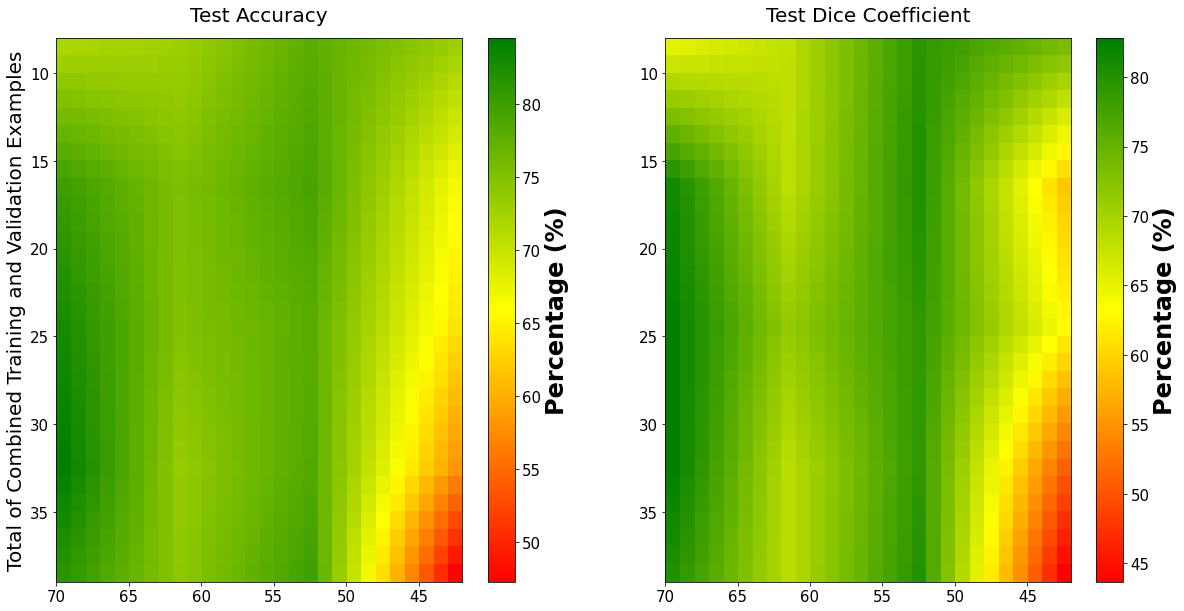

In [ ]:
plt.figure(figsize=(20,10))
gyr = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

plt.subplot(121)
plt.title(r'Test Accuracy', fontsize=20, y=1.02)
#plt.imshow(znew, vmin=0, vmax=10)
plt.pcolor(x_ax, y_ax, z_acc, cmap=gyr)
#plt.xlabel(r'Angle Range [degrees]', fontsize=20)
plt.ylabel(r'Total Combined Training and Validation Examples', fontsize=20)
cb = plt.colorbar()
cb.set_label(label='Percentage (%)', weight='bold',size='large')
cb.ax.tick_params(labelsize=15)
plt.gca().invert_xaxis()
#plt.xticks([50,40,30,20,10], labels=[10,20,30,40,50])
plt.gca().invert_yaxis()
plt.tick_params(labelsize=15)


plt.subplot(122)
plt.title(r'Test Dice Coefficient', fontsize=20, y=1.02)
#plt.imshow(znew, vmin=0, vmax=10)
plt.pcolor(x_ax, y_ax, z_dice, cmap=gyr)
#plt.xlabel(r'Angle Range [degrees]', fontsize=20)
#plt.ylabel(r'S/N', fontsize=20)
cb = plt.colorbar()
cb.set_label(label='Percentage (%)', weight='bold',size='large',)
cb.ax.tick_params(labelsize=15)
plt.gca().invert_xaxis()
#plt.xticks([50,40,30,20,10], labels=[10,20,30,40,50])
plt.gca().invert_yaxis()
plt.tick_params(labelsize=15)

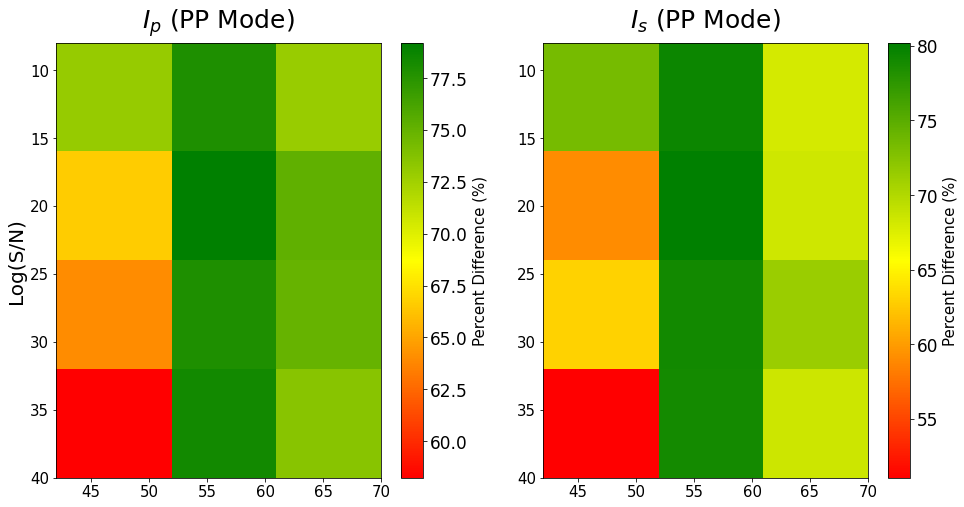

In [ ]:
import matplotlib
gyr = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])


plt.figure(figsize=(16,8))

plt.subplot(121)
plt.title(r'$I_{p}$ (PP Mode)',  fontsize=25, y=1.02)
plt.pcolor(x,y, acc, cmap=gyr)
plt.ylabel(r'Log(S/N)', fontsize=20)
plt.gca().invert_yaxis()
cb = plt.colorbar()
for t in cb.ax.get_yticklabels():
     t.set_fontsize(17)
cb.set_label(label='Percent Difference (%)',size=15)
plt.tick_params(labelsize=15)
#plt.xlim(5,55)

plt.subplot(122)
plt.title(r'$I_{s}$ (PP Mode)', fontsize=25, y=1.02)
plt.pcolor(x, y, dice, cmap=gyr)
plt.gca().invert_yaxis()
cb = plt.colorbar()
for t in cb.ax.get_yticklabels():
     t.set_fontsize(17)
cb.set_label(label='Percent Difference (%)',size=15)
plt.tick_params(labelsize=15)
#plt.xlim(5,55)